# Выбор локации для скважины

Введение:Допустим, вы работаете в добывающей компании «ГлавРосГосНефть». Нужно решить, где бурить новую скважину.
Вам предоставлены пробы нефти в трёх регионах: в каждом 10 000 месторождений, где измерили качество нефти и объём её запасов. Постройте модель машинного обучения, которая поможет определить регион, где добыча принесёт наибольшую прибыль. Проанализируйте возможную прибыль и риски техникой *Bootstrap.*

Шаги для выбора локации:

- В избранном регионе ищут месторождения, для каждого определяют значения признаков;
- Строят модель и оценивают объём запасов;
- Выбирают месторождения с самым высокими оценками значений. Количество месторождений зависит от бюджета компании и стоимости разработки одной скважины;
- Прибыль равна суммарной прибыли отобранных месторождений.

Цели проекта:
 Постройте модель для определения региона, где добыча принесёт наибольшую прибыль. Проанализируйте возможную прибыль и риски техникой Bootstrap.
 
 План работы:
1. Загрузка и подготовка данных.
2. Обучение и проверка модели.
3. Подготовка к расчёту прибыли.
4. Расчёт прибыли и рисков
5. Оформление выводов.

Описание данных:

Данные геологоразведки трёх регионов находятся в файлах: 
/datasets/geo_data_0.csv. 
/datasets/geo_data_1.csv. 
/datasets/geo_data_2.csv.
id — уникальный идентификатор скважины;
f0, f1, f2 — три признака точек (неважно, что они означают, но сами признаки значимы);
product — объём запасов в скважине (тыс. баррелей).

Условия задачи:
* Для обучения модели подходит только линейная регрессия (остальные — недостаточно предсказуемые).
* При разведке региона исследуют 500 точек, из которых с помощью машинного обучения выбирают 200 лучших для разработки.
* Бюджет на разработку скважин в регионе — 10 млрд рублей.
* При нынешних ценах один баррель сырья приносит 450 рублей дохода. Доход с каждой единицы продукта составляет 450 тыс. рублей, поскольку объём указан в тысячах баррелей.
* После оценки рисков нужно оставить лишь те регионы, в которых вероятность убытков меньше 2.5%. Среди них выбирают регион с наибольшей средней прибылью.

## Загрузка и подготовка данных

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
# импортируем библиотеку для загрузки модели
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error 
import numpy as np
from scipy import stats as st



from matplotlib import pyplot as plt
import seaborn as sns

In [2]:
RANDOM_STATE = 42
TEST_SIZE = 0.25

In [3]:
# Загружаю данные
geo_data_0 = pd.read_csv('geo_data_0.csv')
geo_data_1 = pd.read_csv('geo_data_1.csv')
geo_data_2 = pd.read_csv('geo_data_2.csv')

In [4]:
# Изучим данные
geo_data_0.head()

,id,f0,f1,f2,product
0,txEyH,0.705745,-0.497823,1.221170,105.280062
1,2acmU,1.334711,-0.340164,4.365080,73.037750
2,409Wp,1.022732,0.151990,1.419926,85.265647
3,iJLyR,-0.032172,0.139033,2.978566,168.620776
4,Xdl7t,1.988431,0.155413,4.751769,154.036647


In [5]:
geo_data_0.shape

(100000, 5)

In [6]:
geo_data_0.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   product  100000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB


In [7]:
geo_data_1.head()

,id,f0,f1,f2,product
0,kBEdx,-15.001348,-8.276000,-0.005876,3.179103
1,62mP7,14.272088,-3.475083,0.999183,26.953261
2,vyE1P,6.263187,-5.948386,5.001160,134.766305
3,KcrkZ,-13.081196,-11.506057,4.999415,137.945408
4,AHL4O,12.702195,-8.147433,5.004363,134.766305


In [8]:
geo_data_1.shape

(100000, 5)

In [9]:
geo_data_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   product  100000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB


In [10]:
geo_data_2.head()

,id,f0,f1,f2,product
0,fwXo0,-1.146987,0.963328,-0.828965,27.758673
1,WJtFt,0.262778,0.269839,-2.530187,56.069697
2,ovLUW,0.194587,0.289035,-5.586433,62.871910
3,q6cA6,2.236060,-0.553760,0.930038,114.572842
4,WPMUX,-0.515993,1.716266,5.899011,149.600746


In [11]:
geo_data_2.shape

(100000, 5)

In [12]:
geo_data_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   product  100000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB


In [13]:
# Поищем явные дубликаты
print(
    geo_data_0.duplicated().sum(),
    geo_data_1.duplicated().sum(),
    geo_data_2.duplicated().sum()
)

0 0 0


In [14]:
# функция для построения ящиков с усами и гистограммы (для числовых признаков)
def boxplot_(df, column):
    fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 6))

    sns.boxplot(data=df, x=column, ax=axes[0])
    axes[0].set_title(f'Ящик с усами для столбца "{column}"')
    axes[0].set_ylabel('Количество')

    sns.histplot(data=df, x=column, kde=True, ax=axes[1])
    axes[1].set_title(f'Гистограмма для столбца "{column}"')
    axes[1].set_ylabel('Частота')

    plt.tight_layout()
    plt.show()

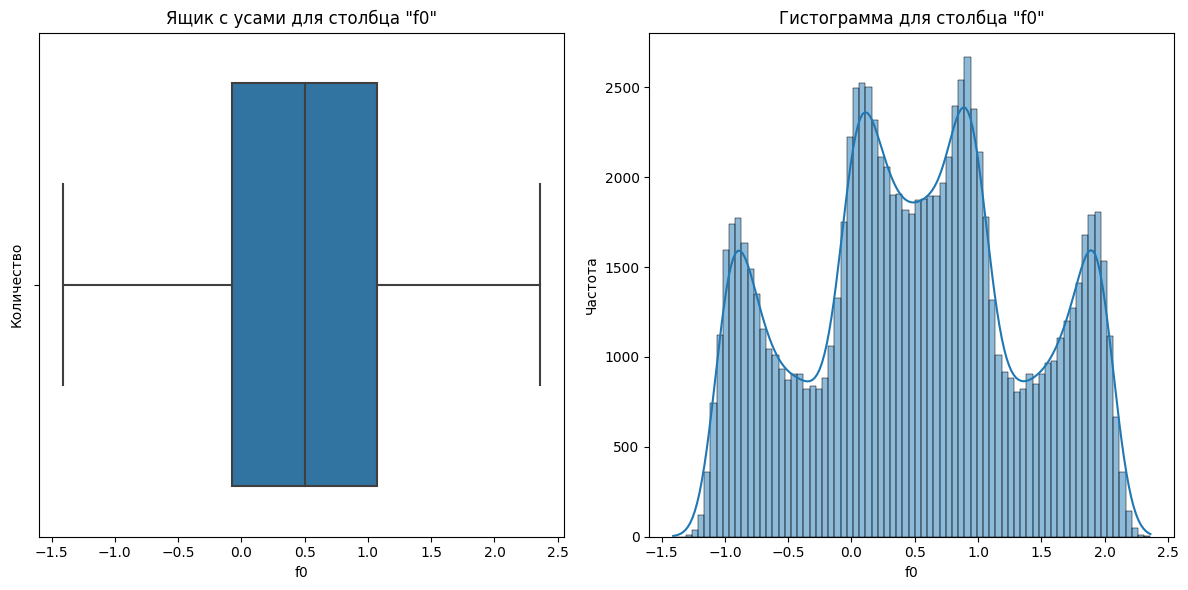

In [15]:
boxplot_(geo_data_0, 'f0')

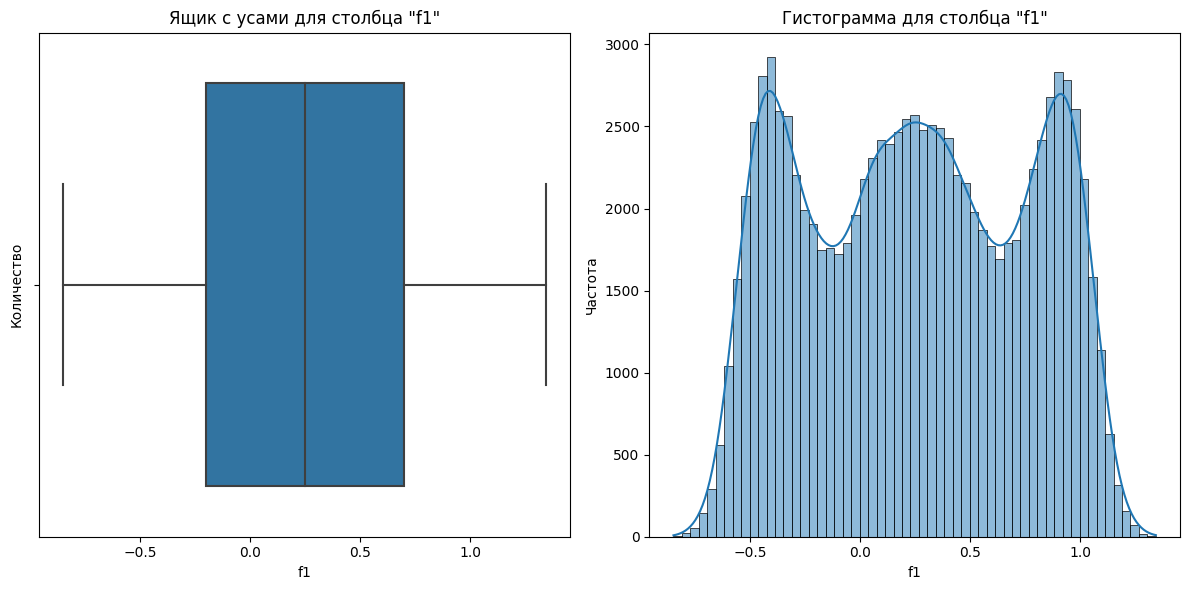

In [16]:
boxplot_(geo_data_0, 'f1')

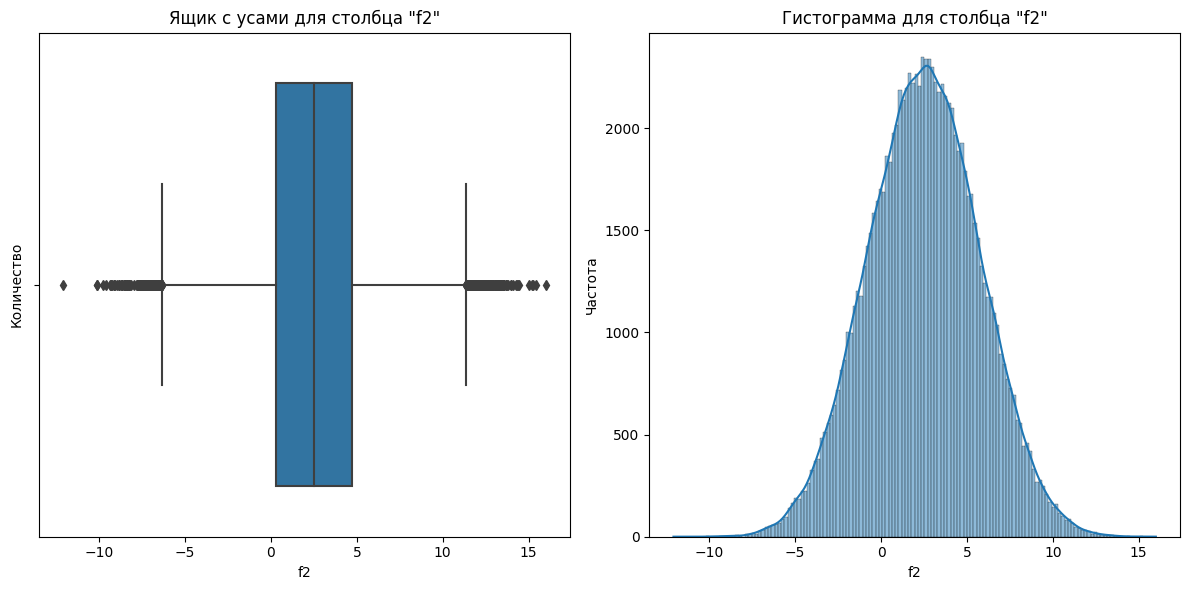

In [17]:
boxplot_(geo_data_0, 'f2')

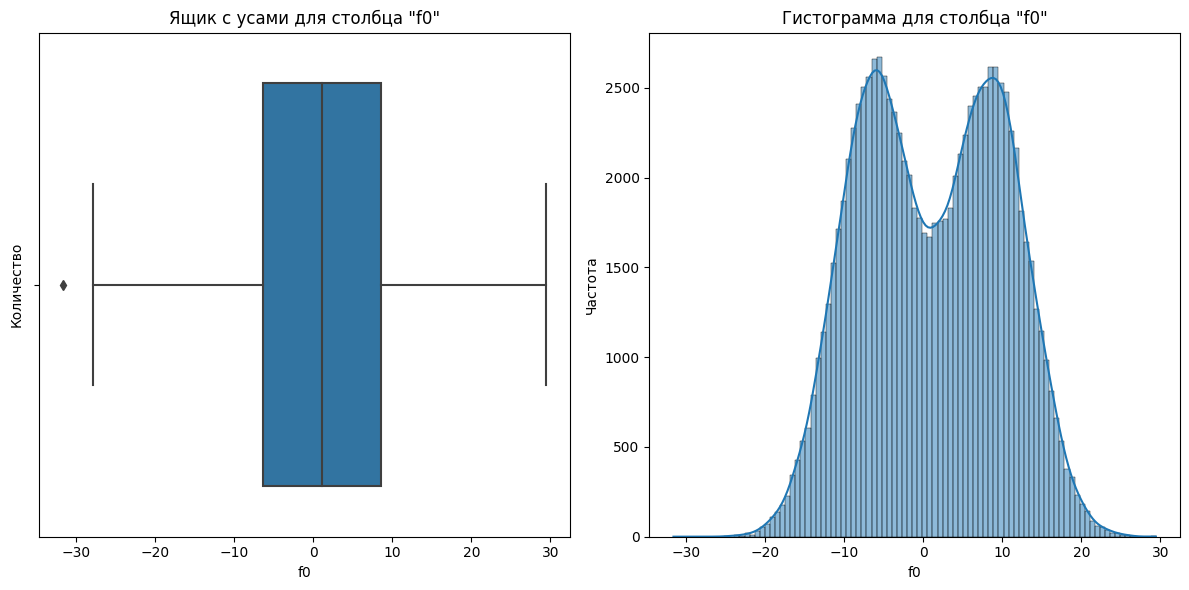

In [18]:
boxplot_(geo_data_1, 'f0')

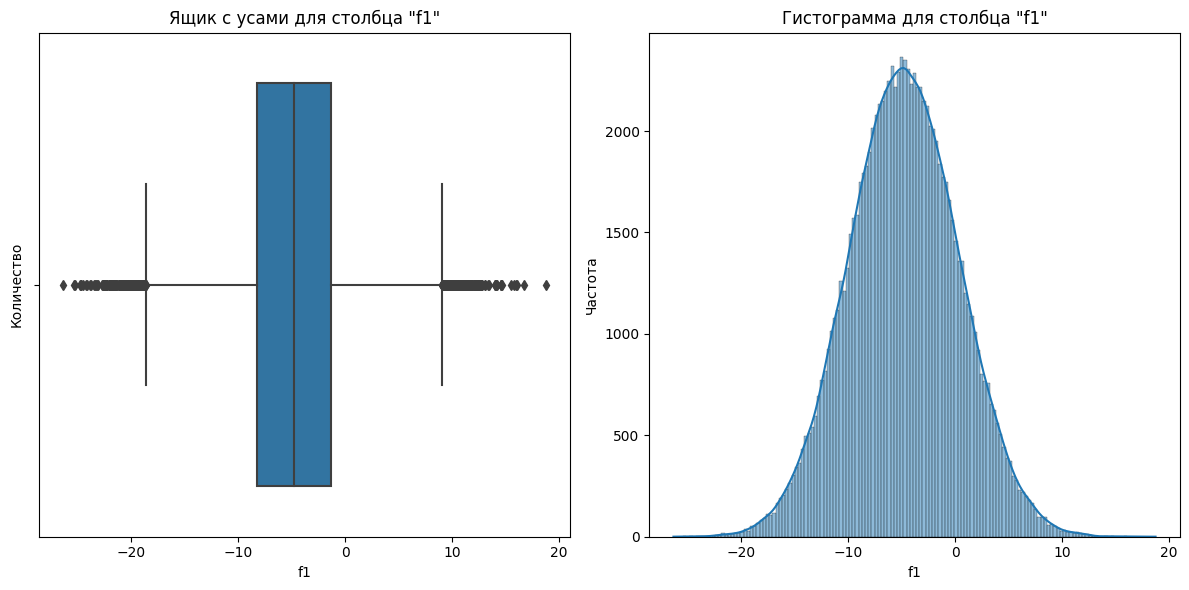

In [19]:
boxplot_(geo_data_1, 'f1')

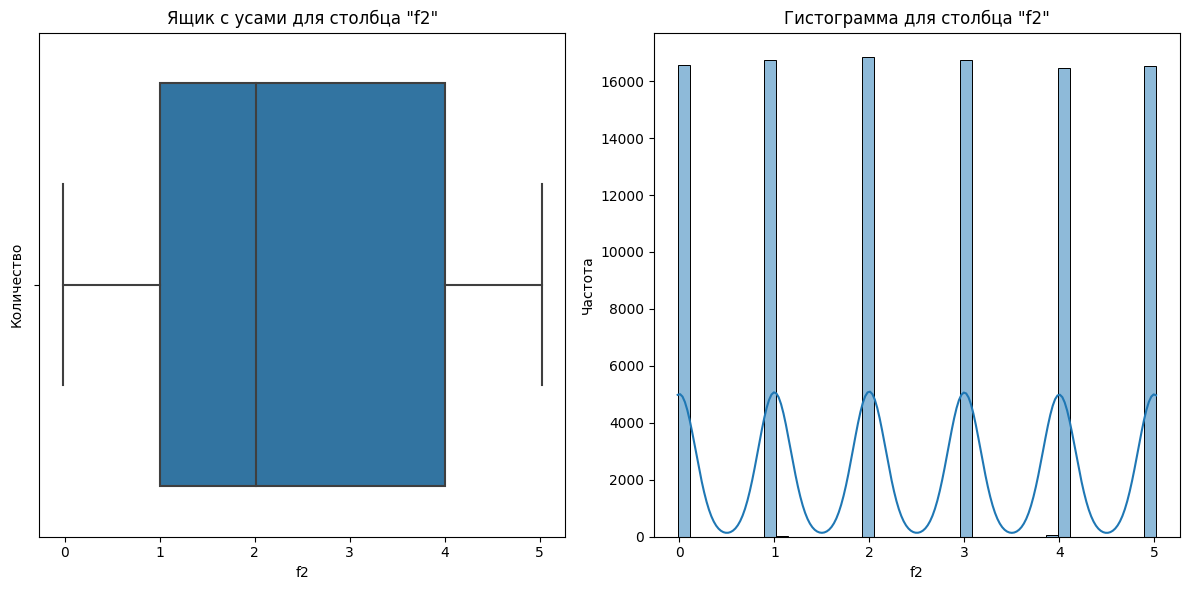

In [20]:
boxplot_(geo_data_1, 'f2')

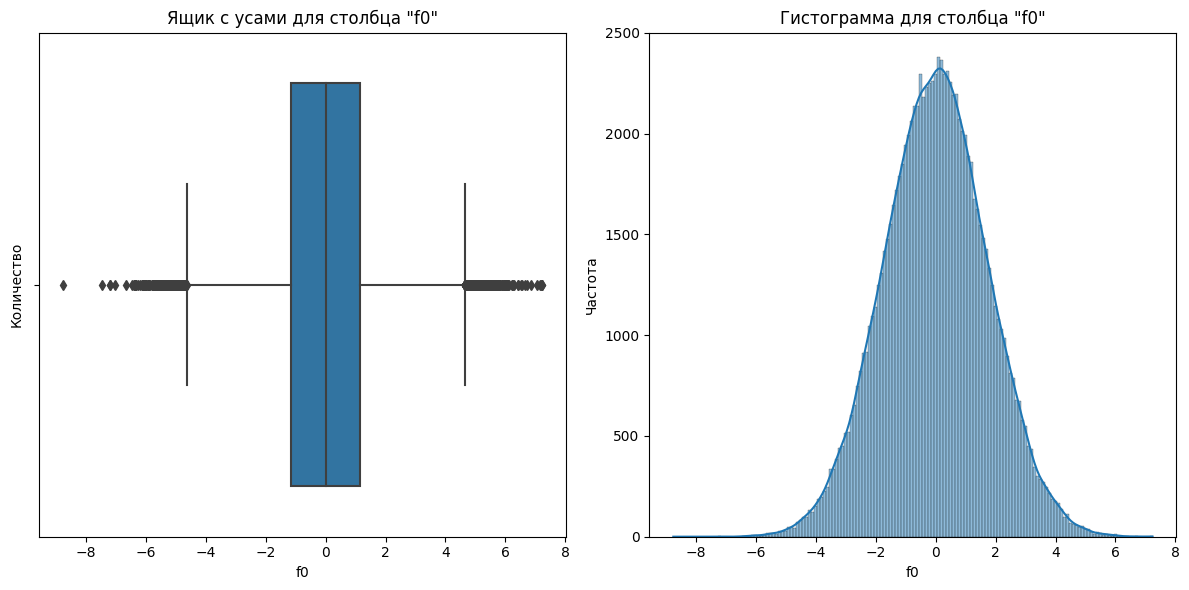

In [21]:
boxplot_(geo_data_2, 'f0')

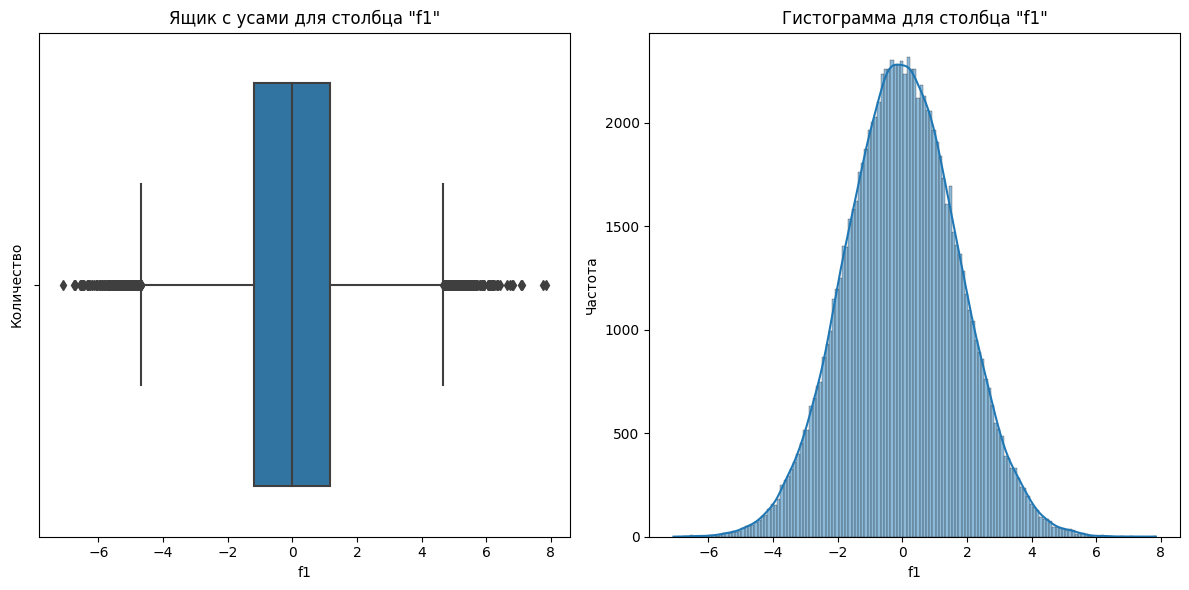

In [22]:
boxplot_(geo_data_2, 'f1')

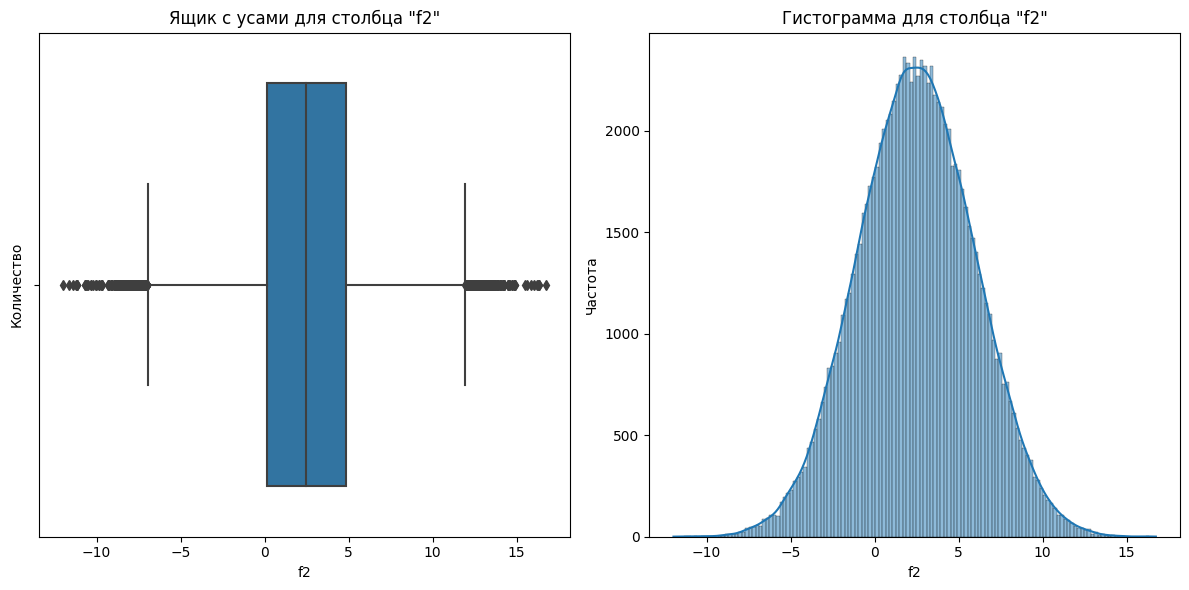

In [23]:
boxplot_(geo_data_2, 'f2')

In [24]:
geo_data_0.describe()

,f0,f1,f2,product
count,100000.000000,100000.000000,100000.000000,100000.000000
mean,0.500419,0.250143,2.502647,92.500000
std,0.871832,0.504433,3.248248,44.288691
min,-1.408605,-0.848218,-12.088328,0.000000
25%,-0.072580,-0.200881,0.287748,56.497507
50%,0.502360,0.250252,2.515969,91.849972
75%,1.073581,0.700646,4.715088,128.564089
max,2.362331,1.343769,16.003790,185.364347


In [25]:
geo_data_1.describe()

,f0,f1,f2,product
count,100000.000000,100000.000000,100000.000000,100000.000000
mean,1.141296,-4.796579,2.494541,68.825000
std,8.965932,5.119872,1.703572,45.944423
min,-31.609576,-26.358598,-0.018144,0.000000
25%,-6.298551,-8.267985,1.000021,26.953261
50%,1.153055,-4.813172,2.011479,57.085625
75%,8.621015,-1.332816,3.999904,107.813044
max,29.421755,18.734063,5.019721,137.945408


In [26]:
geo_data_2.describe()

,f0,f1,f2,product
count,100000.000000,100000.000000,100000.000000,100000.000000
mean,0.002023,-0.002081,2.495128,95.000000
std,1.732045,1.730417,3.473445,44.749921
min,-8.760004,-7.084020,-11.970335,0.000000
25%,-1.162288,-1.174820,0.130359,59.450441
50%,0.009424,-0.009482,2.484236,94.925613
75%,1.158535,1.163678,4.858794,130.595027
max,7.238262,7.844801,16.739402,190.029838


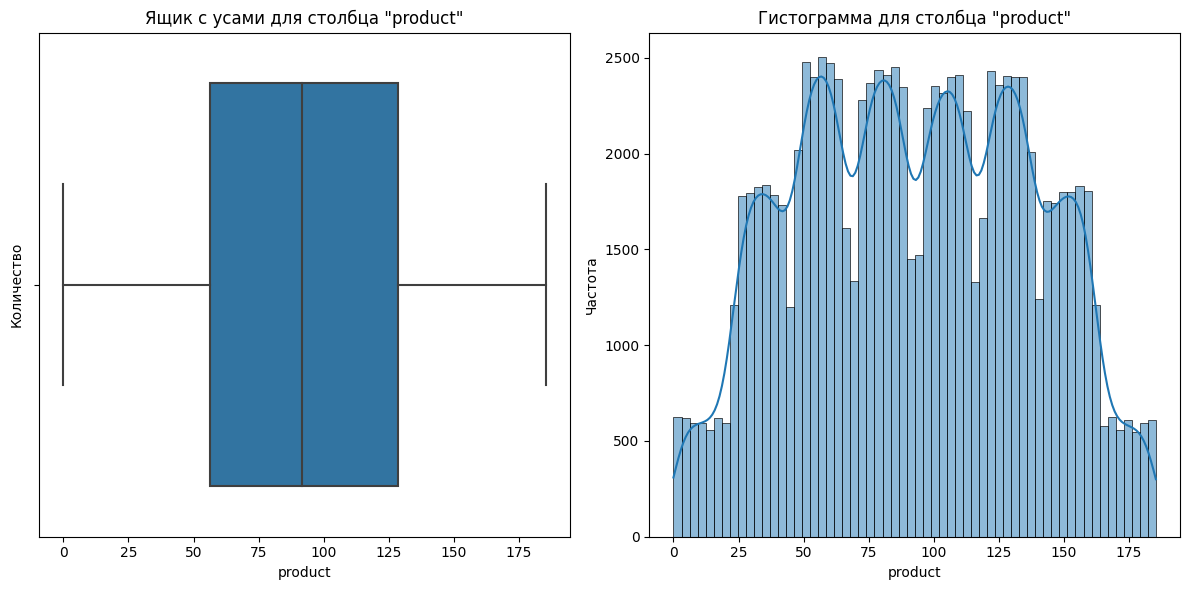

In [27]:
# целевые признаки
boxplot_(geo_data_0, 'product')

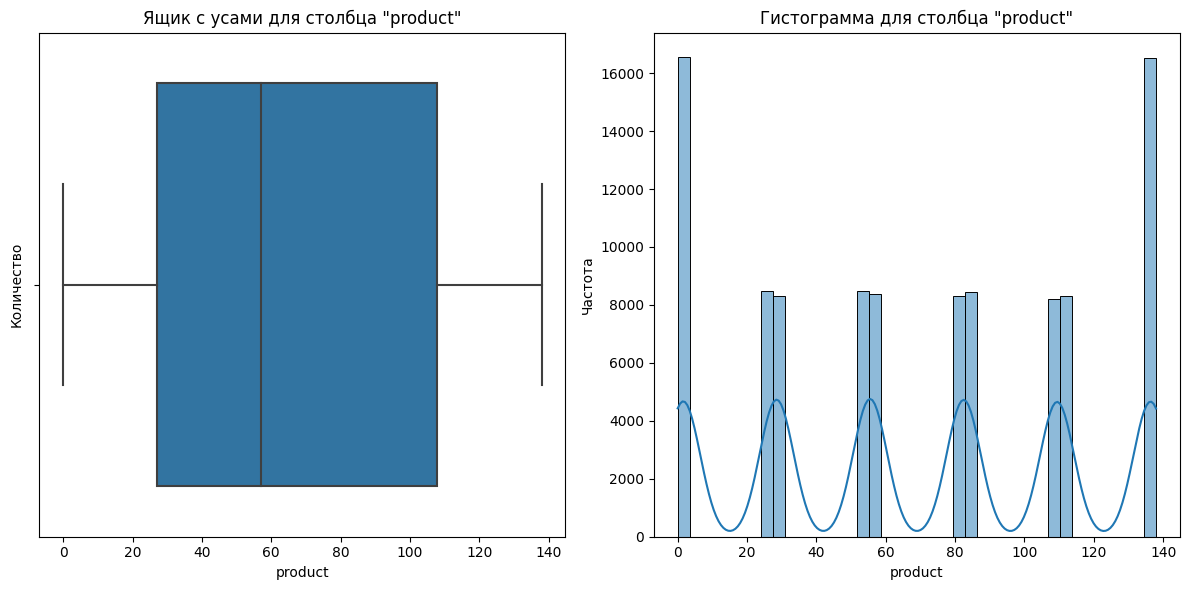

In [28]:
boxplot_(geo_data_1, 'product')

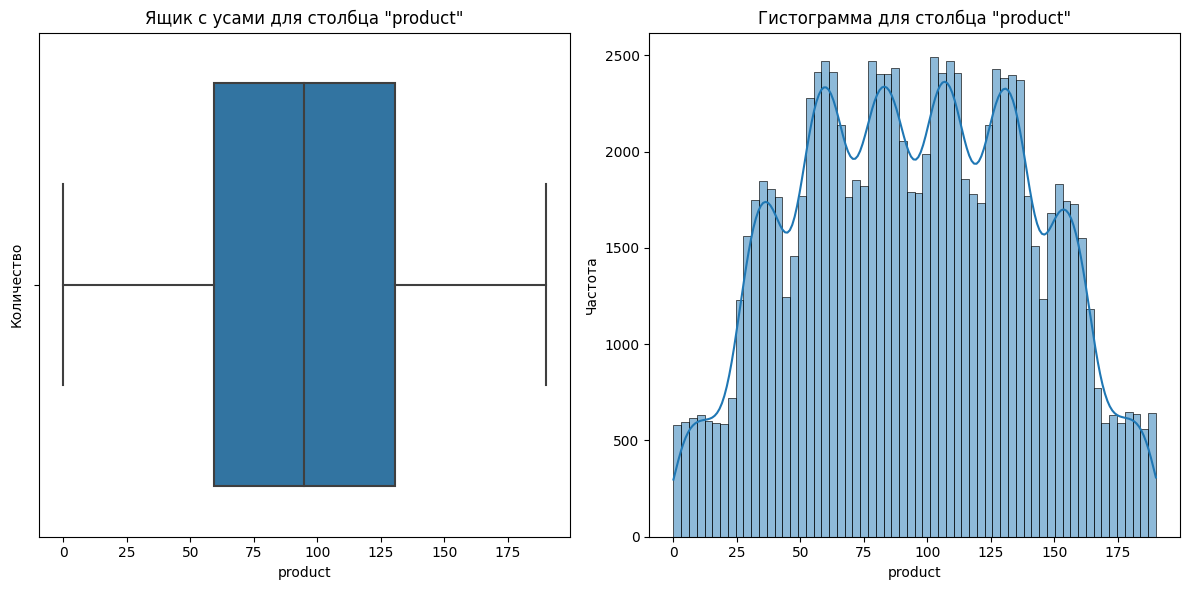

In [29]:
boxplot_(geo_data_2, 'product')

In [30]:
# Корреляционный анализ
geo_data_0[geo_data_2.columns].corr(method='spearman')

,f0,f1,f2,product
f0,1.000000,-0.471395,-0.002685,0.128417
f1,-0.471395,1.000000,0.001413,-0.181143
f2,-0.002685,0.001413,1.000000,0.486394
product,0.128417,-0.181143,0.486394,1.000000


In [31]:
geo_data_1[geo_data_2.columns].corr(method='spearman')

,f0,f1,f2,product
f0,1.000000,0.182248,-0.002000,-0.122869
f1,0.182248,1.000000,-0.003678,-0.033908
f2,-0.002000,-0.003678,1.000000,0.975605
product,-0.122869,-0.033908,0.975605,1.000000


In [32]:
geo_data_2[geo_data_2.columns].corr(method='spearman')

,f0,f1,f2,product
f0,1.000000,0.002493,0.000053,-0.002464
f1,0.002493,1.000000,0.000378,-0.001463
f2,0.000053,0.000378,1.000000,0.448463
product,-0.002464,-0.001463,0.448463,1.000000


Загрузил данные в датафреймы pandas. Изучил данные.
Данные в таблицах соответствуют описанию. Дубликатов нет. Пропусков нет. Есть выбросы. Признаки распределены по разному. Несколько мод, некоторые признаки нормально распределены. Рспределены вокруг нуля. Признак (geo_data_1, 'f2') данные в основном положительные и стремятся к целым числам от 1 до 5. Целевые признаки распределины неномально - несколько мод. Очень высоких корреляций (0.9 +) не видно, скорее всего мультиколлинеарности нет. f2 сильно влияет на целевой признак. Остальные признаки слабее. 

## Обучение и проверка модели

In [33]:
# Подготовка данных
# признак 'id' уберем в индекс
geo_data_0 = geo_data_0.set_index('id')
geo_data_1 = geo_data_1.set_index('id')
geo_data_2 = geo_data_2.set_index('id')

In [34]:
geo_data_0.head()

,f0,f1,f2,product
id,,,,
txEyH,0.705745,-0.497823,1.221170,105.280062
2acmU,1.334711,-0.340164,4.365080,73.037750
409Wp,1.022732,0.151990,1.419926,85.265647
iJLyR,-0.032172,0.139033,2.978566,168.620776
Xdl7t,1.988431,0.155413,4.751769,154.036647


In [35]:
# загружаем данные
X_train_0, X_test_0, y_train_0, y_test_0 = train_test_split(
    geo_data_0.drop('product', axis=1),
    geo_data_0['product'],
    test_size = TEST_SIZE, 
    random_state = RANDOM_STATE
)

In [36]:
print(X_train_0.shape)

(75000, 3)


In [37]:
X_train_1, X_test_1, y_train_1, y_test_1 = train_test_split(
    geo_data_1.drop('product', axis=1),
    geo_data_1['product'],
    test_size = TEST_SIZE, 
    random_state = RANDOM_STATE
)
X_train_2, X_test_2, y_train_2, y_test_2 = train_test_split(
    geo_data_2.drop('product', axis=1),
    geo_data_2['product'],
    test_size = TEST_SIZE, 
    random_state = RANDOM_STATE
)

In [38]:
# Обучаю модели для трез регионов
model_0  = LinearRegression()
model_0.fit(X_train_0, y_train_0)
predictions_0 = model_0.predict(X_test_0)
model_1  = LinearRegression()
model_1.fit(X_train_1, y_train_1)
predictions_1 = model_1.predict(X_test_1)
model_2  = LinearRegression()
model_2.fit(X_train_2, y_train_2)
predictions_2 = model_2.predict(X_test_2)

In [39]:
# Сохранил предсказания и правильные ответы на валидационной выборке.
predictions_0 = pd.DataFrame(predictions_0)
y_test_0 = pd.DataFrame(y_test_0).reset_index(drop=True).reset_index(drop=True)
valid_sample_0 = y_test_0.join(predictions_0, how='left')
valid_sample_0.columns = ['test','predictions']
predictions_1 = pd.DataFrame(predictions_1)
y_test_1 = pd.DataFrame(y_test_1).reset_index(drop=True).reset_index(drop=True)
valid_sample_1 = y_test_1.join(predictions_1, how='left')
valid_sample_1.columns = ['test','predictions']
predictions_2 = pd.DataFrame(predictions_2)
y_test_2 = pd.DataFrame(y_test_2).reset_index(drop=True).reset_index(drop=True)
valid_sample_2 = y_test_2.join(predictions_2, how='left')
valid_sample_2.columns = ['test','predictions']

In [40]:
# средний запас предсказанного сырья
ave_stock_0 = valid_sample_0['predictions'].mean()
ave_stock_1 = valid_sample_1['predictions'].mean()
ave_stock_2 = valid_sample_2['predictions'].mean()
print(ave_stock_0, ave_stock_1, ave_stock_2)

92.39879990657768 68.71287803913762 94.77102387765939


In [41]:
# RMSE
rmse_0 = mean_squared_error(valid_sample_0['predictions'], valid_sample_0['test'], squared=False)
rmse_1 = mean_squared_error(valid_sample_1['predictions'], valid_sample_1['test'], squared=False)
rmse_2 = mean_squared_error(valid_sample_2['predictions'], valid_sample_2['test'], squared=False)
print(rmse_0, rmse_1, rmse_2)

37.75660035026169 0.8902801001028854 40.145872311342174


Обучил модель для каждого региона. Средние предсказания добычи в регионах соответственно 92, 68и 94. А метрика RMSE: 37, 0.8 и 40. Модель для второго региона предсказывает добычу гораздо точнее. Средние значение также у второго региона меньше, чем у первого и третьего.

## Подготовка к расчёту прибыли

In [42]:
budget = 10_000_000_000 #Бюджет на разработку скважин в регионе
total_wells = 500  # разведке региона 500 скважен
needed_wells = 200 # разработка 200 скважен
cost_barrel_k  = 450_000 # стомость тысяци барелей - 450000 рублей

In [43]:
# достаточный объём сырья для безубыточной разработки новой скважины
budget/cost_barrel_k/needed_wells

111.11111111111111

Сохранил ключевые значения для расчётов. Вычеслил достаточный объём сырья для безубыточной разработки новой скважины = 111. Если сравнить со средними предсказаными значениеми, то видим, что достаточный обьем больше чем средние значение. Это означает, что разробатывать наугад скважены не получится. Для этого и применяем выбор с помощью машинного обучения.

<div class="alert alert-block alert-success">
<b>Успех:</b> Значение для безубыточной разработки посчитано верно, с выводом согласен  
</div>


## Расчёт прибыли и рисков 

In [44]:
# Написал функцию для расчёта прибыли по выбранным скважинам и предсказаниям модели
def profit(subsample):
    sort_subsample = subsample.sort_values(by='predictions', ascending=False)[:needed_wells]
    profit_subsample = sum(sort_subsample['test']) * cost_barrel_k - budget
    return profit_subsample

In [45]:
len(valid_sample_0)

25000

In [46]:
# техника Bootstrap с 1000 выборок, чтобы найти распределение прибыли для первого региона
state = np.random.RandomState(12345)
values = []
for i in range(1000):
    wells_subsample = valid_sample_0.sample(frac=total_wells/len(valid_sample_0), replace=True, random_state=state)
    profit_wells = profit(wells_subsample)
    values.append(profit_wells)
values = pd.Series(values)

In [47]:
# средняя прибыль
values.mean()

406278783.4244191

In [48]:
# 95%-й доверительный интервал
lower = values.quantile(0.025)
upper = values.quantile(0.975)
print(lower)
print(upper)

-117742136.49486841
911737050.7514111


In [49]:
# риск убытков
st.percentileofscore(values, 0)

6.7

In [50]:
# техника Bootstrap с 1000 выборок, чтобы найти распределение прибыли для второго региона
state = np.random.RandomState(12345)
values = []
for i in range(1000):
    wells_subsample = valid_sample_1.sample(frac=total_wells/len(valid_sample_1), replace=True, random_state=state)
    profit_wells = profit(wells_subsample)
    values.append(profit_wells)
values = pd.Series(values)

In [51]:
# средняя прибыль
values.mean()

432624131.81315905

In [52]:
# 95%-й доверительный интервал
lower = values.quantile(0.025)
upper = values.quantile(0.975)
print(lower)
print(upper)

16846174.93243599
815972526.2857761


In [53]:
# риск убытков
st.percentileofscore(values, 0)

1.9

In [54]:
# техника Bootstrap с 1000 выборок, чтобы найти распределение прибыли для третьего региона
state = np.random.RandomState(12345)
values = []
for i in range(1000):
    wells_subsample = valid_sample_2.sample(frac=total_wells/len(valid_sample_2), replace=True, random_state=state)
    profit_wells = profit(wells_subsample)
    values.append(profit_wells)
values = pd.Series(values)

In [55]:
# средняя прибыль
values.mean()

377362192.4229155

In [56]:
# 95%-й доверительный интервал
lower = values.quantile(0.025)
upper = values.quantile(0.975)
print(lower)
print(upper)

-170780417.7057291
901772131.3864453


In [57]:
# риск убытков
st.percentileofscore(values, 0)

7.4

Посчитал риски и прибыль для каждого региона, а также  95%-й доверительный интервал. Выбираем регионы, вероятность убытков меньше 2.5%. Риски в регионах соответственно 6.7%, 1.9% и 7.4%.Подходит только один регион. Выбираю второй регион с 432кк средней прибылью.

# Общий вывод

Целями проекта являются: 
* постройть модель для определения региона, где добыча принесёт наибольшую прибыль
* проанализировать возможную прибыль и риски техникой Bootstrap.
Я загрузил данные в датафреймы pandas. Изучил данные. 

Данные в таблицах соответствуют описанию. Дубликатов нет. Пропусков нет. Есть выбросы. Признаки распределены по разному. Несколько мод, некоторые признаки нормально распределены. Рспределены вокруг нуля. Признак (geo_data_1, 'f2') данные в основном положительные и стремятся к целым числам от 1 до 5. Целевые признаки распределины неномально - несколько мод. Очень высоких корреляций (0.9 +) не видно, скорее всего мультиколлинеарности нет. f2 сильно влияет на целевой признак. Остальные признаки слабее. 

Обучил модель для каждого региона. Средние предсказания добычи в регионах соответственно 92, 68и 94. А метрика RMSE: 37, 0.8 и 40. Модель для второго региона предсказывает добычу гораздо точнее. Средние значение также у второго региона меньше, чем у первого и третьего.

Посчитал риски и прибыль для каждого региона, а также  95%-й доверительный интервал. Выбираем регионы, вероятность убытков меньше 2.5%. Риски в регионах соответственно 6.7%, 1.9% и 7.4%.Подходит только один регион. Выбираю второй регион с 432кк средней прибылью.